# РК1
### Милевич Артём Андреевич ИУ5-23М, Вариант 4.

### Задачи 4, 24

Дополнительные данные: для произвольной колонки данных построить график "Ящик с усами (boxplot)".
Для выполнения этих задач я выберу набор данных "Online Sales Dataset - Popular Marketplace Data".

## Задача №4

Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "label encoding".

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
df = pd.read_csv('Online Sales Data.csv')

# Выведем первые строки и список колонок
print("Первые 5 строк датасета:")
print(df.head())
print("\nСтолбцы датасета:")
df.columns

Первые 5 строк датасета:
   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  

Столбцы датасета:


Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

In [60]:
# Создаем копию столбца для наглядности
df['Product Category Encoded'] = df['Product Category']

# Инициализируем LabelEncoder
label_encoder = LabelEncoder()

# Кодируем категории
df['Product Category Encoded'] = label_encoder.fit_transform(df['Product Category'])

# Выводим результат
print("\nРезультат кодирования:")
print(df[['Product Category', 'Product Category Encoded']].head(10))

# Соответствие меток и категорий
print("\nСоответствие категорий и меток:")
for category, encoded_value in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{category}: {encoded_value}")


Результат кодирования:
  Product Category  Product Category Encoded
0      Electronics                         3
1  Home Appliances                         4
2         Clothing                         2
3            Books                         1
4  Beauty Products                         0
5           Sports                         5
6      Electronics                         3
7  Home Appliances                         4
8         Clothing                         2
9            Books                         1

Соответствие категорий и меток:
Beauty Products: 0
Books: 1
Clothing: 2
Electronics: 3
Home Appliances: 4
Sports: 5


## Задача №24

Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе 5% и 95% квантилей.

In [61]:
# Выбираем числовой признак
numeric_column = 'Unit Price'
data = df[numeric_column].dropna()  # Удаляем пропуски

# Выводим статистики до обработки
print("Статистики до удаления выбросов:")
print(data.describe(percentiles=[0.05, 0.95]))

Статистики до удаления выбросов:
count     240.000000
mean      236.395583
std       429.446695
min         6.500000
5%         10.990000
50%        89.990000
95%       904.990000
max      3899.990000
Name: Unit Price, dtype: float64


In [62]:
# Определяем границы (5% и 95%)
lower_bound = data.quantile(0.05)
upper_bound = data.quantile(0.95)

print(f"\nГраницы для отсечения выбросов: [{lower_bound}, {upper_bound}]")


Границы для отсечения выбросов: [10.99, 904.9899999999983]


In [63]:
# Фильтруем данные
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

# Сравним размеры до и после
print(f"\nКоличество строк до очистки: {len(data)}")
print(f"Количество строк после очистки: {len(filtered_data)}")
print(f"Удалено выбросов: {len(data) - len(filtered_data)}")


Количество строк до очистки: 240
Количество строк после очистки: 217
Удалено выбросов: 23


## Для произвольной колонки данных построить график "Ящик с усами (boxplot)"

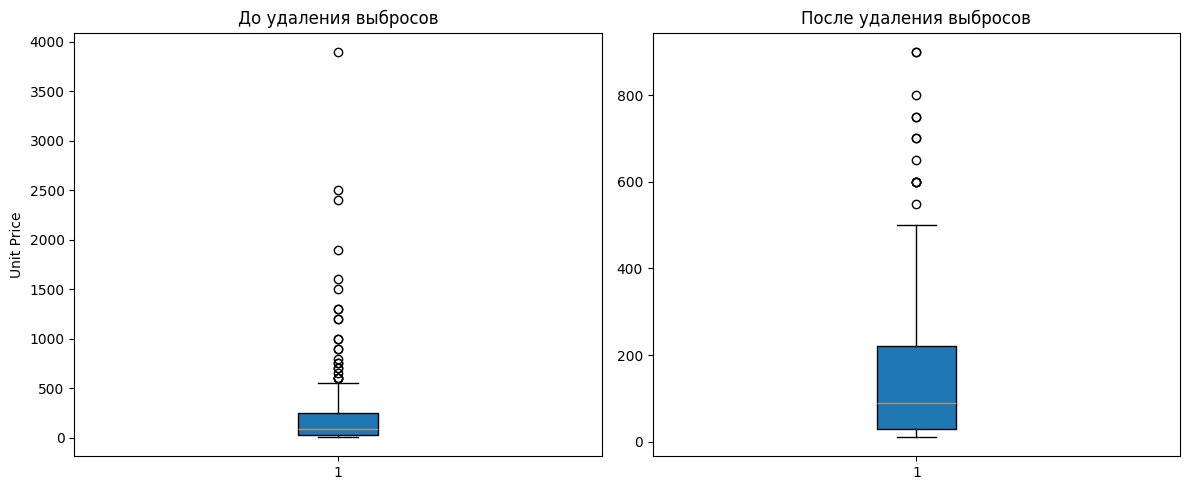

In [64]:
# Создаем subplot для сравнения
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot до обработки
axes[0].boxplot(data, vert=True, patch_artist=True)
axes[0].set_title('До удаления выбросов')
axes[0].set_ylabel(numeric_column)

# Boxplot после обработки
axes[1].boxplot(filtered_data, vert=True, patch_artist=True)
axes[1].set_title('После удаления выбросов')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

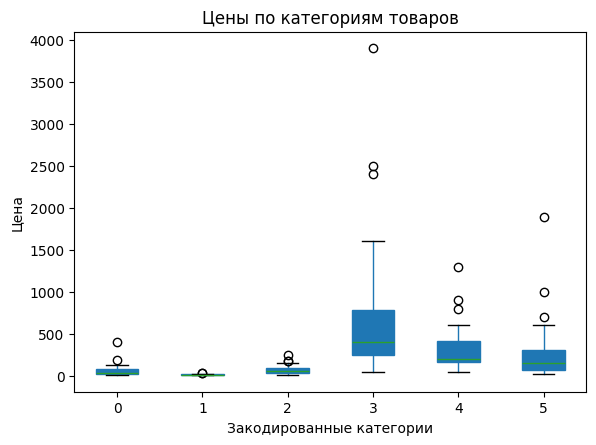

In [65]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Unit Price', by='Product Category Encoded', grid=False, patch_artist=True)
plt.title('Цены по категориям товаров')
plt.xlabel('Закодированные категории')
plt.ylabel('Цена')
plt.suptitle('')
plt.show()